## Homework 1
From Chapter 3, found on page 129 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

# Import specific objects
from textwrap import wrap # to avoiding label overlapping in plots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


_a)_	Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `model.summary()` function to print the results. Comment on the output

(i) Is there a relationship between the predictor and the response?

(ii) How strong is the relationship between the predictor and the response?

(iii) Is the relationship between the predictor and the response positive or negative?

(iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [2]:
type(Auto)

pandas.core.frame.DataFrame

In [3]:
#Add your code here
X = Auto['horsepower']
y = Auto['mpg']

X = sm.add_constant(X)
model1 = sm.OLS(y,X).fit()
#result1 = model1.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           7.03e-81
Time:                        08:34:24   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [4]:
39.94 + ((-0.1578)*98)

24.4756

## Answers
_(i)_ with the p-value of 0.000 we can conclude that the model is a good fit   
_(ii)_ with R-squared = 0.606 we can conclude that the relationship between mpg and horsepower is good as almost 60% of mpg is explained by horsepower
_(iii)_ the relationship between predictor and response is negative as coef = negative (-0.1578)
_(iv)_ for a horsepower of 98 mpg can be calculated as (39.94 + ((-0.1578)*98) = 24.4756

_b)_	Plot the response and the predictor in a new set of axes `ax` using `scatter`. Use the `ax.plot()` function with the predictor and the model prediction as defined in the lab to display the least squares regression line.

In [5]:
predicted_mpg = model1.predict(X)

<Axes: title={'center': 'Scatter Plot of MPG vs Horsepower'}, xlabel='horsepower', ylabel='mpg'>

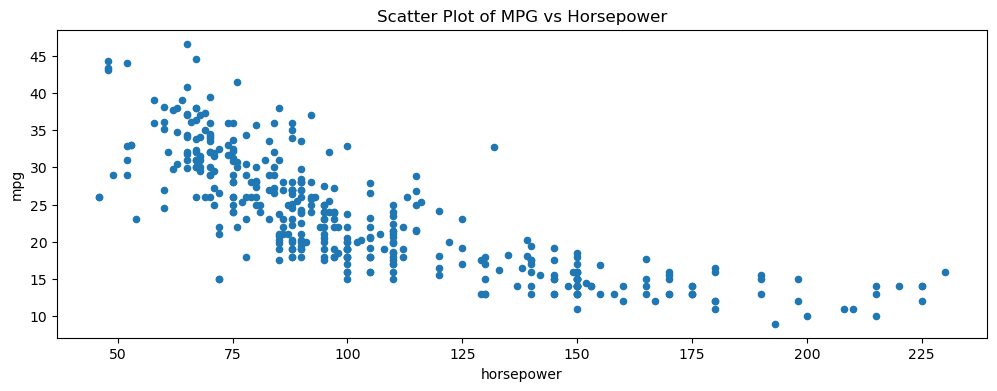

In [6]:
#Add your code here
Auto.plot(kind='scatter', x='horsepower',y='mpg', figsize=(12, 4), title='Scatter Plot of MPG vs Horsepower')

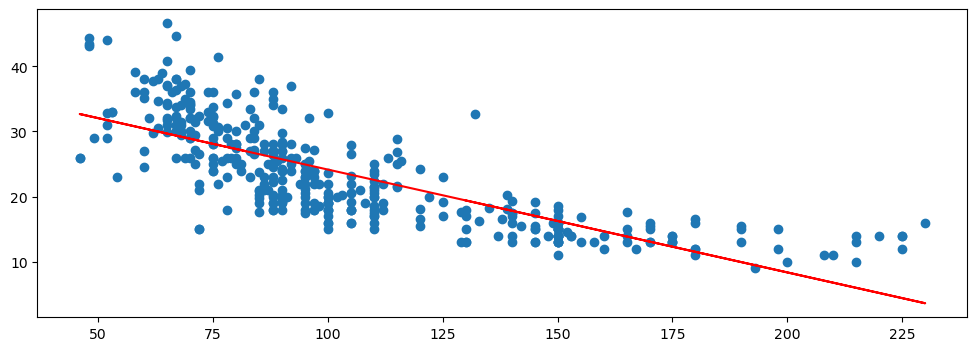

In [14]:
fig, ax =subplots(1,1,figsize=(12, 4))
ax.scatter(Auto['horsepower'],Auto['mpg'])
ax.plot(Auto['horsepower'],predicted_mpg, color = 'red')

In [13]:
import matplotlib.pyplot as plt
plt.show()

_c)_	Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

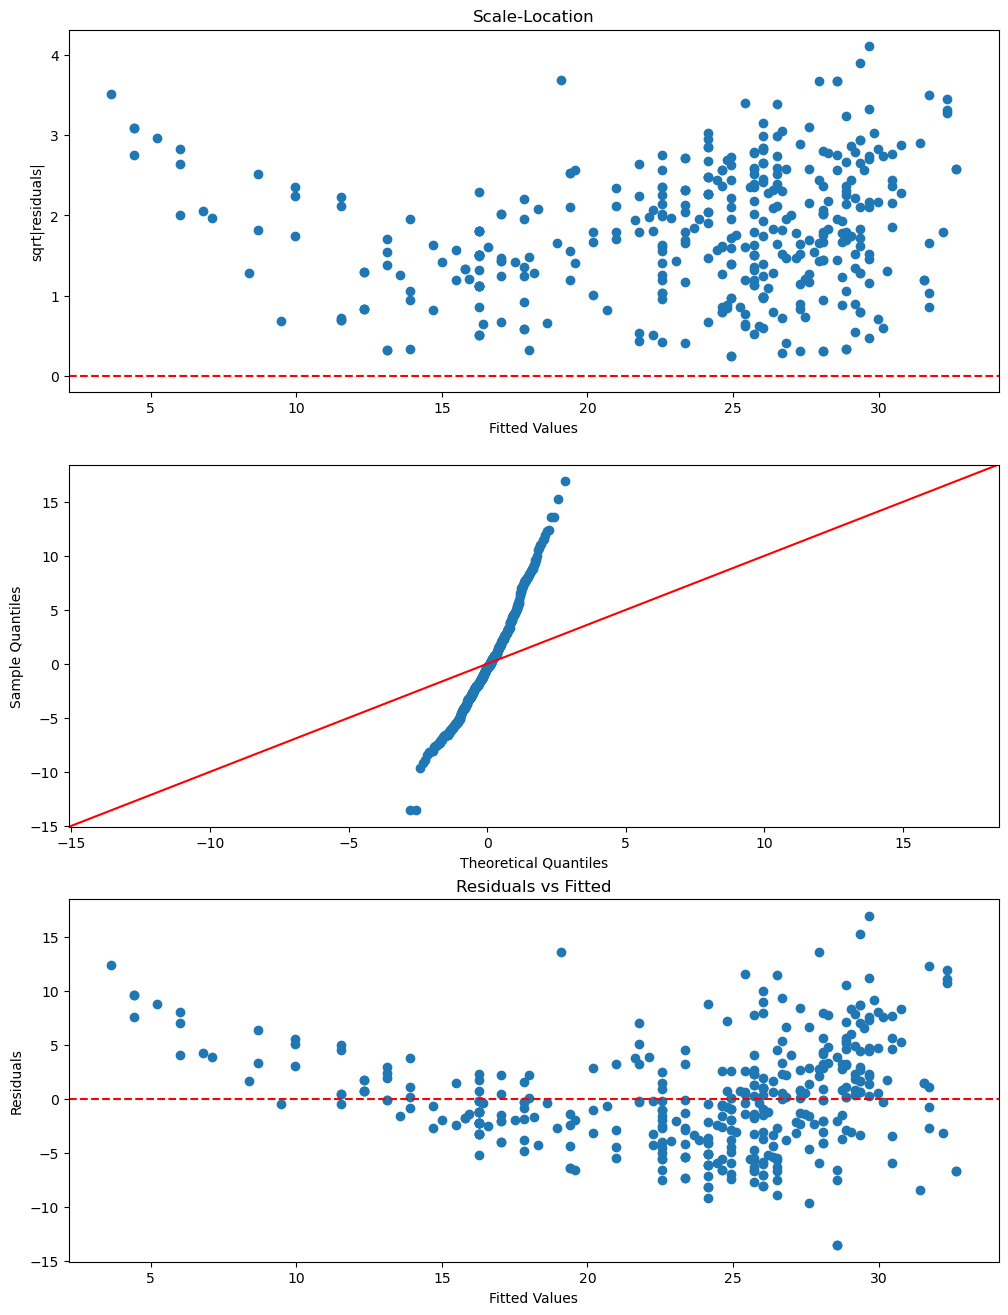

In [37]:
#Add your code here
#Plot at least the Scale-Location Plot, the QQ Plot and the Residuals vs Fitted Values Plot
residuals = model1.resid
rmae = np.sqrt(np.abs(residuals))
fitted_values = model1.fittedvalues

fig, axs =subplots(3,1,figsize=(12, 16))

# Scale Location Plot 
axs[0].scatter(fitted_values,rmae)
axs[0].axhline(y=0,color='r',linestyle='--')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('sqrt|residuals|')
axs[0].set_title('Scale-Location')

#Q-Q plot
sm.qqplot(residuals, line='45',ax= axs[1])
ax[1].set_title('Q-Q Plot')

# Residual vs Fitted Plot 
axs[2].scatter(fitted_values,residuals)
axs[2].axhline(y=0,color='r',linestyle='--')
axs[2].set_xlabel('Fitted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Fitted')

plt.show()

Additional Practice Questions: 
- How would you describe this exercise in an interview to both a technical and non-technical interviewer? 
- What are the key insights you would want to show? 
- Can you think of a business context where this exercise would have applications?